In [1]:
# Load the dataset:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import mnist

In [2]:
# Split the dataset and do our preprocessing:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28 is the original 2D image. We transform our 2D dataset to 1D
output_dim = nb_classes = 10 # 10 digits --> 10 classes
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim) # 60000 is the amount of train entries
X_test = X_test.reshape(10000, input_dim) # 10000 is the amount of test entries
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # normalize each vector by dividing each element by 255 (this is the maximum value of the RGB color scale)
X_test /= 255

In [3]:
# One hot code our target variable using to_categorical function of Keras' utils module
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [4]:
# Take a look at the shape of X_train. We have 60000 rows and 784 features
X_train.shape

(60000, 784)

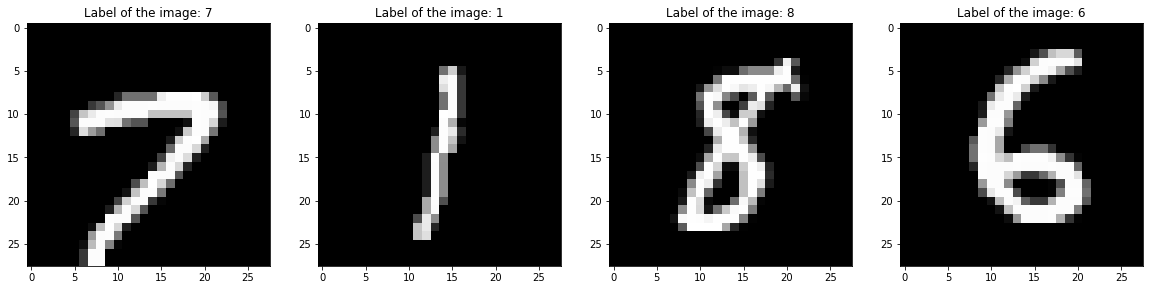

In [6]:
# Take a look at some of the original images:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(1,4,2)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(1,4,3)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(1,4,4)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

###  Implement a three layer ANN model with 128, 64 and 10 neurons in the layers using tanh activation function for each layer using categorical_crossentropy loss function

In [10]:
# Defining the model:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

# Compiling the model:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 41us/sample - loss: 1.0221 - accuracy: 0.7462
Epoch 2/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.5193 - accuracy: 0.8711
Epoch 3/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4202 - accuracy: 0.8891
Epoch 4/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3733 - accuracy: 0.8980
Epoch 5/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3446 - accuracy: 0.9046
Epoch 6/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3242 - accuracy: 0.9089
Epoch 7/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3087 - accuracy: 0.9125
Epoch 8/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2958 - accuracy: 0.9157
Epoch 9/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2849 - accuracy: 0.9186
Epoch 10/20
60

In [11]:
# Print out the testing score:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.2095155075162649
Test accuracy: 0.9388


### Implement a three layer ANN model with 128, 64 and 10 neurons in the layers using sigmoid activation function for each layer using categorical_crossentropy loss function

In [12]:
# Defining the model:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model1 = Sequential()
# our first dense layer
model1.add(Dense(128, input_shape=(784,), activation="sigmoid"))
# our second dense layer
model1.add(Dense(64, activation="sigmoid"))
# last layer is the output layer.
model1.add(Dense(10, activation="softmax"))

# Compiling the model:
model1.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model1.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 53us/sample - loss: 2.2891 - accuracy: 0.1957
Epoch 2/20
60000/60000 [==============================] - 2s 41us/sample - loss: 2.2279 - accuracy: 0.3525
Epoch 3/20
60000/60000 [==============================] - 2s 33us/sample - loss: 2.1647 - accuracy: 0.4743
Epoch 4/20
60000/60000 [==============================] - 2s 30us/sample - loss: 2.0756 - accuracy: 0.5458
Epoch 5/20
60000/60000 [==============================] - 2s 34us/sample - loss: 1.9478 - accuracy: 0.5849
Epoch 6/20
60000/60000 [==============================] - 2s 34us/sample - loss: 1.7776 - accuracy: 0.6252
Epoch 7/20
60000/60000 [==============================] - 2s 31us/sample - loss: 1.5840 - accuracy: 0.6539
Epoch 8/20
60000/60000 [==============================] - 2s 38us/sample - loss: 1.3986 - accuracy: 0.6869
Epoch 9/20
60000/60000 [==============================] - 2s 40us/sample - loss: 1.2413 - accuracy: 0.7148
Epoch 10/20
60

In [13]:
# Print out the testing score:
score = model1.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.561860973072052
Test accuracy: 0.8573


### Implement a three layer ANN model with 128, 64 and 10 neurons in the layers using ReLU activation function for each layer using categorical_crossentropy loss function

In [14]:
# Defining the model:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model2 = Sequential()
# our first dense layer
model2.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model2.add(Dense(64, activation="relu"))
# last layer is the output layer.
model2.add(Dense(10, activation="softmax"))

# Compiling the model:
model2.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model2.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 44us/sample - loss: 1.2646 - accuracy: 0.6702
Epoch 2/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.5035 - accuracy: 0.8670
Epoch 3/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3889 - accuracy: 0.8924
Epoch 4/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3427 - accuracy: 0.9036
Epoch 5/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3153 - accuracy: 0.9095
Epoch 6/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2953 - accuracy: 0.9151
Epoch 7/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2797 - accuracy: 0.9196
Epoch 8/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2664 - accuracy: 0.9230
Epoch 9/20
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2547 - accuracy: 0.9264
Epoch 10/20
60

In [15]:
# Print out the testing score:
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.17490061144530772
Test accuracy: 0.9482


ReLu activation function gave us the best test score and test accuracy.

### Implement a three layer ANN model with 128, 64 and 10 neurons in the layers using tanh activation function for each layer using hinge loss function

In [20]:
# Defining the model:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model3 = Sequential()
# our first dense layer
model3.add(Dense(128, input_shape=(784,), activation="tanh"))
# our second dense layer
model3.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model3.add(Dense(10, activation="softmax"))

# Compiling the model:
model3.compile(optimizer='sgd', loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model3.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.9915 - accuracy: 0.4325
Epoch 2/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.7613 - accuracy: 0.6994
Epoch 3/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.5773 - accuracy: 0.7849
Epoch 4/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.4647 - accuracy: 0.8421
Epoch 5/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3897 - accuracy: 0.8661
Epoch 6/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3424 - accuracy: 0.8772
Epoch 7/20
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3110 - accuracy: 0.8850
Epoch 8/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2887 - accuracy: 0.8901
Epoch 9/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2716 - accuracy: 0.8949
Epoch 10/20
60

In [21]:
# Print out the testing score:
score = model3.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.185254743771255
Test accuracy: 0.9221


### Implement a three layer ANN model with 128, 64 and 10 neurons in the layers using sigmoid activation function for each layer using hinge loss function

In [22]:
# Defining the model:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model4 = Sequential()
# our first dense layer
model4.add(Dense(128, input_shape=(784,), activation="sigmoid"))
# our second dense layer
model4.add(Dense(64, activation="sigmoid"))
# last layer is the output layer.
model4.add(Dense(10, activation="softmax"))

# Compiling the model:
model4.compile(optimizer='sgd', loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model4.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 48us/sample - loss: 1.0056 - accuracy: 0.1878
Epoch 2/20
60000/60000 [==============================] - 2s 35us/sample - loss: 1.0029 - accuracy: 0.2573
Epoch 3/20
60000/60000 [==============================] - 2s 35us/sample - loss: 1.0021 - accuracy: 0.3111
Epoch 4/20
60000/60000 [==============================] - 2s 38us/sample - loss: 1.0015 - accuracy: 0.3618
Epoch 5/20
60000/60000 [==============================] - 3s 44us/sample - loss: 1.0009 - accuracy: 0.4077
Epoch 6/20
60000/60000 [==============================] - 2s 33us/sample - loss: 1.0003 - accuracy: 0.4479
Epoch 7/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.9998 - accuracy: 0.4861
Epoch 8/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.9994 - accuracy: 0.5175
Epoch 9/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.9990 - accuracy: 0.5467
Epoch 10/20
60

In [23]:
# Print out the testing score:
score = model4.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.9946555833816528
Test accuracy: 0.6982


### Implement a three layer ANN model with 128, 64 and 10 neurons in the layers using ReLU activation function for each layer using hinge loss function

In [24]:
# Defining the model:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model5 = Sequential()
# our first dense layer
model5.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model5.add(Dense(64, activation="relu"))
# last layer is the output layer.
model5.add(Dense(10, activation="softmax"))

# Compiling the model:
model5.compile(optimizer='sgd', loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model5.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 48us/sample - loss: 1.0118 - accuracy: 0.3004
Epoch 2/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.9830 - accuracy: 0.5421
Epoch 3/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.9161 - accuracy: 0.6442
Epoch 4/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.7748 - accuracy: 0.7089
Epoch 5/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.5673 - accuracy: 0.7972
Epoch 6/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4169 - accuracy: 0.8608s - loss: 0.428
Epoch 7/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3346 - accuracy: 0.8798
Epoch 8/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2910 - accuracy: 0.8883
Epoch 9/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2641 - accuracy: 0.8946

In [25]:
# Print out the testing score:
score = model5.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.16725292722247542
Test accuracy: 0.927


The highest accuracies in both the training and the test sets are achieved using the ReLU function. Moreover, all accuracies for all the models are lower when we train our models using hinge loss in comparison to using cross entropy loss.